# **Aprendizado de Máquina Estatístico**
## **Seminário - Inferência Causal [Potential Outcomes, Rubin]**
#### Integrantes: 

- Daniel Shinoda Pascoal
- Flavio Margarito Martins de Barros
- Gabriel Tupinamba da Cunha Leandro

## Conteúdo:

- 1 Introdução
- 2 O Modelo Causal de Rubin
- 3 Atribuição aleatória
- 4 Analise de Regressão de experimentos
- 5 Estudo de caso
- 6 Conclusão

## **Introdução**

**"Correlação não é igual a causalidade"**

<br>

Essa frase é um mantra na comunidade de estatística e ciência de dados, ela é repetida diversas vezes para nos manter longe da armadilha que é **confundir correlação com causalidade**. A palavra correlação, enquanto tem um significado definido em estatística é usado de forma coloquial na linguagem cotidiana significando, muitas vezes, relação. Entretando a correlação é um tipo especial de "relação" uma vez que usualmente, quando esse termo é utilizado, quer se dizer que há uma relação **linear**, assim como na correlação de Pearson. Mas, além de existirem outros tipos de correlações na estatística, como a correlação bisserial por exemplo, o fato de existir uma correlação diferente de zero **não implica** que há uma **relação de fato** entre as variáveis, tampouco que essa relação seja linear. O oposto também: o fato de uma correlação **ser nula não implica que não haja relação entre as variáveis**, uma vez que esta pode ser não linear. A maioria modelos de machine learning utilizados são ótimos para capturar a correlações presente nos dados, mas não nos auxiliam em interpretar o que causa os padrões observados, o que limita nossa capacidade de decisão. 

<br>

Dentro do mundo dos negócios é muito comum perguntas em que se deseja saber se determinado anúncio de marketing trouxe mais vendas na compania, muitas vezes um aumento das vendas pode estar mascarado por uma queda de preço ou de estoque no mercado. Esse problema também é muito comum em outras áreas como medicina onde precisamos entender se determinado tratamento realmente teve o efeito desejado ou na economia onde queremos saber se determinada politica trouxe efeitos positivos na renda dos índividuos. Não basta ter um modelo que seja capaz de produzir ótimas prediçõe, é necessário que, de alguma forma, entendamos as relações causais e sejamos capazes de compreender quais são os mecanismos geradores dos dados.

Para ajudar a entender os efeitos causais algumas metodologias tem sido utilizadas na literatura. Nesse documento iremos nos focar na abordagem **"Potential outcomes"** de **Donald Rubin**.

## **O Modelo Causal de Rubin**

Imagine a seguinte situação, um determinado indivíduo terminou sua graduação, e quando chegou aos seus quarenta anos possuia uma alta remuneração em comparação com a média da população. Caso esse mesmo indivíduo não tivesse terminado a graduação ele teria uma remuneração menor? Não temos como saber a resposta para essa pergunta pois teríamos que voltar ao passado para descobrir o que teria acontecido caso essa mesma pessoa não tivesse concluído essa graduação. Ainda assim, mesmo que fosse possível voltar no tempo e submeter esse indivíduo a um "tratamento" diferente, ainda haveria a possibilidade de o resultado ser fruto de situações aleatórias que poderia contribuir ou dificultar a vida desse indivíduo, tal que para realizar um experimento como esse deveríamos repetílo com um número significativo de pessoas. Acreditamos que é óbvio que uma abordagem como essa é impossível na prática, tal que temos que utilizar dados observacionais e a partir deles, utilizando algum método, tentar descobrir quais são as relações causais.

<br>

No cerne dessa situação encontramos o **"Problema Fundamental da Inferência Causal"**, que reside na impossibilidade de observarmos um individuo "com" e "sem" tratamento ao mesmo tempo. Por isso o **Modelo Causal de Rubin** , também conhecido como **"Potential Outcomes Model"** (Modelo de resultados potenciais) lida com a idéia de "Resultados Potenciais".

<br>

### Notação

Para contextualizar os conceitos apresentados vamos utilizar o dataset do artigo  de **Robert Lalonde** , "Evaluating the Econometric Evaluations of Training Programs", American Economic Review, Vol. 76, pp. 604-620, como estudo de caso, nesse estudo ele avalia o efeito de determinado treinamento no salário de dois grupos de indivíduos.

<br>

Vamos definir formalmente o conceito de "potential outcomes", vamos denotar como $\mathbf{T}$ o efeito do tratamento, que no nosso caso será se o índivíduo teve treinamento ou não, nesse caso $\mathbf{T}$ será uma variável binária $\mathbf{T} \in \text{{1,0}}$.

<br>
Potential Outcomes: 

$
Y_{ti}=\begin{cases}
t=1 \ \text{se o individuo i recebeu o tratamento}\\
t= 0 \ \text{caso contrario}\\
\end{cases}
$

Ou de maneira mais geral : $Y_{0i} + (Y_{1i} - Y_{0i})T_i$

<br>

Dessa forma supomos que o individuo i tivesse recebido o treinamento, nesse caso teriamos o resultado potencial $Y_{1i}$ que representa sua remuneração após o tratamento, já $Y_{0i}$ seria o resultado potencial caso esse mesmo indivíduo não tivesse recebido o treinamento, que nesse caso seria um "salário imaginário" uma vez que não temos como saber qual seria o verdadeiro resultado, também podemos chamar $Y_{0i}$ de **Contrafactual**.

<br>

### Efeito Médio do Tratamento 

<br>

Essa notação é importante pois com ela podemos estabelecer que $Y_{1i} - Y_{0i}$  seria o efeito causado pelo treinamento no indivíduo i.

Dessa forma definiremos o **Efeito Médio do Tratamento (ATE)** (ATE - Average Treatment Effect) dos indivíduos como:

- \\(ATE = E[Y_{1i} - Y_{0i}]\\)


Também vamos definir como **Efeito Médio do Tratamento nos Tratados (ATT)** (ATT - Average Treatment Effect on the treated) o efeito médio do tratamento condicionado apenas nos indivíduos que receberam treinamento. 

- \\(ATT = E[Y_{1i} - Y_{0i} | T=1]\\)

<br>

## **Atribuição aleatória e o viés de seleção**

É claro que as equações acima são apenas hipotéticas, não temos como obter esses resultados pois não podemos voltar no passado, uma suposição ingênua seria estimar o efeito causado pelo treinamento subtraindo o salario dos individuos que receberam treinamento daqueles que não receberam treinamento (grupo controle), umas vez que o único resultado potencial que de fato temos acesso (observamos o efeito) é $E[Y_{1i}|T=1]$ e $E[Y_{0i}|T=0]$ em outras palavras seria assumir $E[Y_{1i}|T=1] - E[Y_{0i}|T=0]$ como o efeito causado pelo treinamento.

<br>

A demonstração abaixo nos mostra o problema dessa abordagem ingênua, se somarmos e subtrairmos o contrafactual $E[Y_{0i}|T=1]$ na nossa equação, teremos:

$
E[Y_{1i}|T=1] - E[Y_{0i}|T=0] = E[Y_{1i}|T=1] - E[Y_{0i}|T=0] +E[Y_{0i}|T=1] - E[Y_{0i}|T=1]
$

$
E[Y_{1i}|T=1] - E[Y_{0i}|T=0] = \underbrace{E[Y_{1i} - Y_{0i}|T=1]}_{ATT} + \underbrace{\{ E[Y_{0i}|T=1] - E[Y_{0i}|T=0] \}}_{Viés}
$

Ou seja subtrair o resultado observado do grupo tratado com o resultado observado do grupo não tratado é igual ao efeito médio do tratamento nos tratados, que queremos descobrir, mais o **viés de seleção**. O viés de seleção ocorre quando há um mecanismo que seleciona aqueles indivíduos ao final de um processo. Assim, ao analisarmos a população de "sobreviventes" ela pode não ser mais representativa da população original.

No nosso exemplo um possivel viés de seleção seria selecionar para o grupo que receberá o treinamento ($T=1$), grupos que naturalmente já teriam um salario melhor mesmo sem treinamento, por exemplo por terem ido a faculdade e no grupo sem treinamento ($T=0$), indivíduos que não completaram a faculdade.

<br>

### Atribuição aleatória

A grande sacada aqui é que caso o viés de seleção seja zero ou próximo de zero, a difença do efeito do grupo com treinamento e sem treinamento de fato será igual ao efeito médio do tratamento no grupo tratado (ATT).

Dessa maneira selecionando aleatoriamente os dois grupos de indivíduos, o viés seria reduzido a zero e com isso:

$
E[Y_{1i}|T=1] - E[Y_{0i}|T=0] = E[Y_{1i} - Y_{0i}|T=1] = ATT
$

<br>

## **Análise de Regressão dos Experimentos**

Nós podemos remodelar a nossa equação de potential outcomes $Y_{0i} + (Y_{1i} - Y_{0i})T_i$ como um problema de regressão, somando e subtraindo $E[Y_{0i}]$ temos:

$$
Y_i = \underbrace{\alpha}_{E[Y_{0i}]} + \underbrace{\rho}_{Y_{1i} - Y_{0i}}T_i + \underbrace{\eta}_{Y_{0i}-E[Y_{0i}]}
$$

Aplicando o valor esperado para os grupos tratamento e controle:

$ E[Y_i |T_i = 1] = \alpha + \rho + E[\eta_i|T_i=1]$

$ E[Y_i |T_i = 0] = \alpha + E[\eta_i|T_i=0]$

Então:

$
E[Y_{i}|T=1] - E[Y_{i}|T=0] = \rho + \underbrace{\{ E[\eta_i|T=1] - E[\eta_i|T=0] \}}_{Viés}
$

Dessa maneira se a atribuição for aleatória, eliminamos o viés de seleção e teremos: 

$E[Y_{i}|T=1] - E[Y_{i}|T=0] = \rho $

Isso nos fornece uma valiosa ferramenta, uma vez que ao calcular uma simples regressão linear nosso coeficiente $\rho$ será igual ao efeito médio do tratamento.

## **Estudo de Caso**

Como mencionado acima, esse dataset foi utilizado pelo economista Robert Lalonde, onde ele analisou o efeito de determinado treinamento na renda de um grupo de individuos, no ano de 1975 e em 1978 após o treinamento, parte do grupo recebeu o treinamento (Tratados) e o outro não (Controle).

O dataset é composto pelas covariáveis: 

- 'treatment_indicator', 1 se tratado 0 se não
- 'age', idade
- 'education', anos de escolaridade
- 'Black', 1 se negro e 0 se não
- 'Hispanic', 1 se hispanico e 0 se não
- 'Married', 1 se casado, 0 se não
- 'nodegree', 1 se cursou ensino superior, 0 se não
- 'RE74', renda em 1974
- 'RE75', renda em 1975
- 'RE78', renda em 1978



In [15]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
#df = pd.read_csv("TMDb_updated.CSV")

#df_control = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprend Maq Est/nsw_control.txt", sep="  ", header=None)
#df_control.columns= ['treatment_indicator','age','education','Black','Hispanic','Married','nodegree','RE75','RE78']

#df_treated = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprend Maq Est/nsw_treated.txt", sep="  ", header=None)
#df_treated.columns= ['treatment_indicator','age','education','Black','Hispanic','Married','nodegree','RE75','RE78']

#df = pd.concat([df_control, df_treated])

df_control = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprend Maq Est/nswre74_control.txt", sep="  ", header=None)
df_control.columns= ['treatment_indicator','age','education','Black','Hispanic','Married','nodegree','RE74','RE75','RE78']

df_treated = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprend Maq Est/nswre74_treated.txt", sep="  ", header=None)
df_treated.columns= ['treatment_indicator','age','education','Black','Hispanic','Married','nodegree','RE74','RE75','RE78']
df = pd.concat([df_control, df_treated])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [16]:
df.groupby('treatment_indicator')['RE78'].agg(['median','mean'])

,median,mean
treatment_indicator,,
0.0,3138.7955,4554.801126
1.0,4232.3090,6349.143530


Como podemos ver, apenas agregando os dados em grupo controle e de tratamento e calculando sua média, aparentemente o grupo que recebeu o tratamento teve uma renda $1795 maior em 1978 do que o grupo que não foi tratado.

### Regressão Linear

Vamos inicialmente assumir que o estudo foi feito de forma controlada e randomizada e fazer o calculo de regressão linear. Nesse estudo iremos usar a biblioteca em python **Causal Inference** que conta com um estimador de regressão linear via minimos quadrados.

In [7]:
!pip install causalinference 

In [17]:
from causalinference import CausalModel

covariaveis = ['age','education','Black','Hispanic','Married','nodegree','RE75']

causal = CausalModel(
    Y=df['RE78'].values, 
    D=df['treatment_indicator'].values, 
    X=df[covariaveis].values)

causal.est_via_ols(adj=1)
print(causal.estimates)



Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   1636.278    667.157      2.453      0.014    328.649   2943.906



/usr/local/lib/python3.7/dist-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


Nossa regressão linear mostra que nosso ATE foi de $\$1.636,00$, um pouco inferior ao resultado obtido simplesmente calculando a diferença das médias. O grande ganho dessa abordagem em relação a outra é que ela nos fornece o intervalo de confiança 95% de para o efeito médio do tratamento. O intervalo está entre $\$328,00$ e $\$2.943,00$, um intervalo bem grande. A grande questão aqui é que esse não foi um experimento bem controlado como de fato vamos verificar nas visualizações de balanceamento abaixo.

### EDA - Balanceamento do dataset

In [18]:
df.groupby('treatment_indicator')['RE78'].count()

treatment_indicator
0.0    260
1.0    185
Name: RE78, dtype: int64

O grupo tratado é menor que o grupo controle.

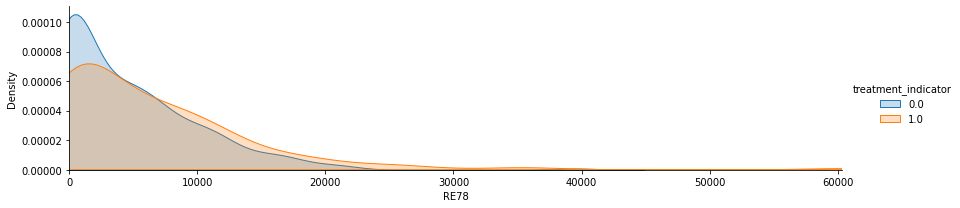

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

a = sns.FacetGrid( df, hue = 'treatment_indicator', aspect=4)
a.map(sns.kdeplot, 'RE78', shade= True )
a.set(xlim=(0 , df['RE78'].max()))
a.add_legend()

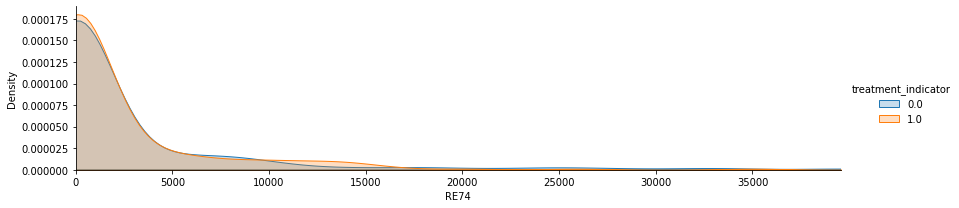

In [24]:
a = sns.FacetGrid( df, hue = 'treatment_indicator', aspect=4)
a.map(sns.kdeplot, 'RE74', shade= True )
a.set(xlim=(0 , df['RE74'].max()))
a.add_legend()

Como podemos ver, esse dataset não está balanceado, temos muito mais pessoas sem tratamento. 

No ponto de partida do estudo, a renda dos dois grupos de fato são parecidas. A questão é, saindo do campo da renda, será que as outras covariáveis também foram controladas? Por exemplo, será que o grupo tratado não possui uma maior concentração de individuos com maior escolaridade e consequentemente esses performariam melhor mesmo sem o treinamento?

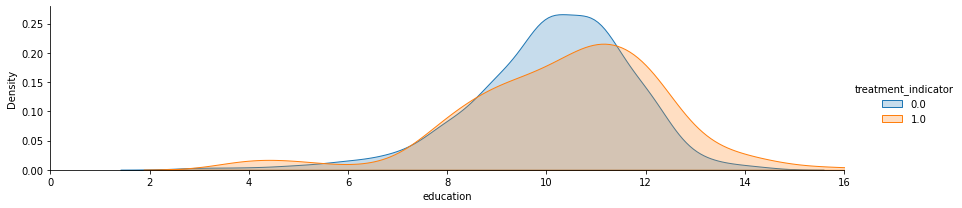

In [21]:
a = sns.FacetGrid( df, hue = 'treatment_indicator', aspect=4)
a.map(sns.kdeplot, 'education', shade= True )
a.set(xlim=(0 , df['education'].max()))
a.add_legend()

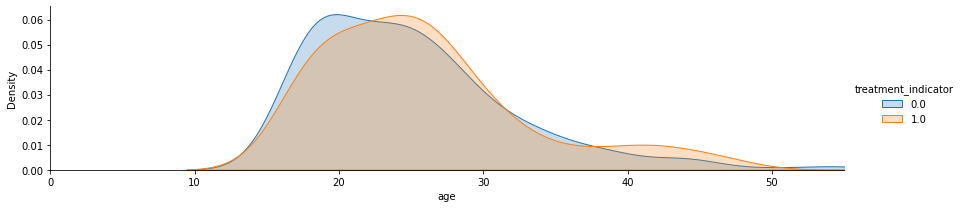

In [22]:
a = sns.FacetGrid( df, hue = 'treatment_indicator', aspect=4)
a.map(sns.kdeplot, 'age', shade= True )
a.set(xlim=(0 , df['age'].max()))
a.add_legend()

Como podemos ver o grupo tratado possui em média maior ano de educação do que aqueles do grupo controle além de uma maior idade. Poderiamos argumentar que o treinamento no grupo controle não faz diferença uma vez que no grupo tratado temos individuos com maior educação e mais velhos.

### Controlando Covariáveis

O principal desafio na inferência causal é controlar os **"confounders" (confundidores)**, em muitas situações como essa, só temos os dados observacionais e não temos como fazer um novo experimento com um melhor balanceamento dos individuos.

A ideia aqui é controlar os confundidores, e assumir que a dependencia entre o resultado esperado e o tratamento são dependentes apenas das covariáveis $X$ que conseguimos observar, e nenhuma outra. 

$$(Y_0, Y_1) \perp T \; | \; X$$

Fazendo isso, se conseguirmos controlar $X$, por exemplo olhando apenas individuos com mesmo tempo de escolaridade, o nosso resultado vai depender apenas do tratamento dado.

Existem diversas formas de controlar as covariaveis na literatura mas não vamos entrar no detalhe de nenhuma delas nesse seminário introdutorio, o pacote **CausalInference** que usamos é equipado com ferramentas dentre elas o **"Matching Estimator"** que controla as covariaveis utilizando vizinhos-mais-próximos (NN) para encontrar amostras parecidas.





In [23]:
causal.est_via_matching(bias_adj=True)
print(causal.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   1636.278    667.157      2.453      0.014    328.649   2943.906

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   2253.399   1091.230      2.065      0.039    114.587   4392.211
           ATC   2199.242   1212.127      1.814      0.070   -176.526   4575.010
           ATT   2329.511   1258.672      1.851      0.064   -137.487   4796.508



/usr/local/lib/python3.7/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


Utilizando esse pacote vemos que o efeito médio do treinamento foi de $\$2.253,00$ e temos 95% de confiança que o intervalo de melhora na renda cai entre $\$114,00$ e $\$4.575,00$ dólares.

## **Conclusão**

Nesse seminário apresentamos os conceitos fundamentais que permeiam o framework de potential outcomes, passando pelo problema fundamental da inferência causal, discutindo a importância de experimentos aleatórios para medir o efeito do tratamento até métodos para estimar o efeito médio do tratamento com regressão linear e apresentando o pacote causalinference que possui diversos métodos para controle dos "Cofounders".

A inferência causal não é um campo simples e mesmo usando as técnicas mais sofisticadas para controle dos confundidores nem sempre conseguimos ter um bom resultado, porém o conhecimento de inferência causal nos equipa melhor para podermos conseguir responder perguntas com mais embasamento e ir muito mais além do que apenas máquinas de previsão.

## Referências

- https://jonnyphillips.github.io/FLS6415/Class_3/Angrist%20&%20Pischke.pdf
- https://en.wikipedia.org/wiki/Rubin_causal_model
- https://www.fsb.muohio.edu/lij14/420_paper_Rubin74.pdf
- http://users.nber.org/~rdehejia/nswdata2.html